# Base naive forecase method


## Data Prep

In [24]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [2]:
# Import data
flu = pd.read_csv('data/data.csv')
weather = pd.read_csv('data/reg_weather.csv')
google_flu = pd.read_csv('data/reg_google_grippe.csv')
google_symptoms = pd.read_csv('data/reg_google_fieber_husten.csv')
pop = pd.read_csv('data/weekly_imputed_pop_data_final.csv')

In [3]:
# Create dataframe for country-level observations, no differentiation between sex or age
flu_CH = flu.query('georegion_type == "country" and agegroup == "all" and sex == "all"').copy()

# Create dataframe for regional observations, no differentiation between sex or age
flu_reg = flu.query('georegion_type == "sentinella_region" and agegroup == "all" and sex == "all"').copy()

# Drop unknown region entries from flu_region using mask
flu_reg = flu_reg[~(flu_reg['georegion'] == 'unknown')]

# Select columns required for analysis
selected_cols = ['temporal', 'georegion', 'popExtrapolation', 'incValue', 'value']
flu_reg = flu_reg[selected_cols]
flu_reg.rename(columns={'popExtrapolation':'flu_cases'}, inplace=True)

In [4]:
date_dict = {"2013-01-06": "2013-W02", "2013-01-13": "2013-W03", "2013-01-20": "2013-W04", "2013-01-27": "2013-W05", "2013-02-03": "2013-W06", "2013-02-10": "2013-W07", "2013-02-17": "2013-W08", "2013-02-24": "2013-W09", "2013-03-03": "2013-W10", "2013-03-10": "2013-W11", "2013-03-17": "2013-W12", "2013-03-24": "2013-W13", "2013-03-31": "2013-W14", "2013-04-07": "2013-W15", "2013-04-14": "2013-W16", "2013-04-21": "2013-W17", "2013-04-28": "2013-W18", "2013-05-05": "2013-W19", "2013-05-12": "2013-W20", "2013-05-19": "2013-W21", "2013-05-26": "2013-W22", "2013-06-02": "2013-W23", "2013-06-09": "2013-W24", "2013-06-16": "2013-W25", "2013-06-23": "2013-W26", "2013-06-30": "2013-W27", "2013-07-07": "2013-W28", "2013-07-14": "2013-W29", "2013-07-21": "2013-W30", "2013-07-28": "2013-W31", "2013-08-04": "2013-W32", "2013-08-11": "2013-W33", "2013-08-18": "2013-W34", "2013-08-25": "2013-W35", "2013-09-01": "2013-W36", "2013-09-08": "2013-W37", "2013-09-15": "2013-W38", "2013-09-22": "2013-W39", "2013-09-29": "2013-W40", "2013-10-06": "2013-W41", "2013-10-13": "2013-W42", "2013-10-20": "2013-W43", "2013-10-27": "2013-W44", "2013-11-03": "2013-W45", "2013-11-10": "2013-W46", "2013-11-17": "2013-W47", "2013-11-24": "2013-W48", "2013-12-01": "2013-W49", "2013-12-08": "2013-W50", "2013-12-15": "2013-W51", "2013-12-22": "2013-W52", "2013-12-29": "2014-W01", "2014-01-05": "2014-W02", "2014-01-12": "2014-W03", "2014-01-19": "2014-W04", "2014-01-26": "2014-W05", "2014-02-02": "2014-W06", "2014-02-09": "2014-W07", "2014-02-16": "2014-W08", "2014-02-23": "2014-W09", "2014-03-02": "2014-W10", "2014-03-09": "2014-W11", "2014-03-16": "2014-W12", "2014-03-23": "2014-W13", "2014-03-30": "2014-W14", "2014-04-06": "2014-W15", "2014-04-13": "2014-W16", "2014-04-20": "2014-W17", "2014-04-27": "2014-W18", "2014-05-04": "2014-W19", "2014-05-11": "2014-W20", "2014-05-18": "2014-W21", "2014-05-25": "2014-W22", "2014-06-01": "2014-W23", "2014-06-08": "2014-W24", "2014-06-15": "2014-W25", "2014-06-22": "2014-W26", "2014-06-29": "2014-W27", "2014-07-06": "2014-W28", "2014-07-13": "2014-W29", "2014-07-20": "2014-W30", "2014-07-27": "2014-W31", "2014-08-03": "2014-W32", "2014-08-10": "2014-W33", "2014-08-17": "2014-W34", "2014-08-24": "2014-W35", "2014-08-31": "2014-W36", "2014-09-07": "2014-W37", "2014-09-14": "2014-W38", "2014-09-21": "2014-W39", "2014-09-28": "2014-W40", "2014-10-05": "2014-W41", "2014-10-12": "2014-W42", "2014-10-19": "2014-W43", "2014-10-26": "2014-W44", "2014-11-02": "2014-W45", "2014-11-09": "2014-W46", "2014-11-16": "2014-W47", "2014-11-23": "2014-W48", "2014-11-30": "2014-W49", "2014-12-07": "2014-W50", "2014-12-14": "2014-W51", "2014-12-21": "2014-W52", "2014-12-28": "2015-W01", "2015-01-04": "2015-W02", "2015-01-11": "2015-W03", "2015-01-18": "2015-W04", "2015-01-25": "2015-W05", "2015-02-01": "2015-W06", "2015-02-08": "2015-W07", "2015-02-15": "2015-W08", "2015-02-22": "2015-W09", "2015-03-01": "2015-W10", "2015-03-08": "2015-W11", "2015-03-15": "2015-W12", "2015-03-22": "2015-W13", "2015-03-29": "2015-W14", "2015-04-05": "2015-W15", "2015-04-12": "2015-W16", "2015-04-19": "2015-W17", "2015-04-26": "2015-W18", "2015-05-03": "2015-W19", "2015-05-10": "2015-W20", "2015-05-17": "2015-W21", "2015-05-24": "2015-W22", "2015-05-31": "2015-W23", "2015-06-07": "2015-W24", "2015-06-14": "2015-W25", "2015-06-21": "2015-W26", "2015-06-28": "2015-W27", "2015-07-05": "2015-W28", "2015-07-12": "2015-W29", "2015-07-19": "2015-W30", "2015-07-26": "2015-W31", "2015-08-02": "2015-W32", "2015-08-09": "2015-W33", "2015-08-16": "2015-W34", "2015-08-23": "2015-W35", "2015-08-30": "2015-W36", "2015-09-06": "2015-W37", "2015-09-13": "2015-W38", "2015-09-20": "2015-W39", "2015-09-27": "2015-W40", "2015-10-04": "2015-W41", "2015-10-11": "2015-W42", "2015-10-18": "2015-W43", "2015-10-25": "2015-W44", "2015-11-01": "2015-W45", "2015-11-08": "2015-W46", "2015-11-15": "2015-W47", "2015-11-22": "2015-W48", "2015-11-29": "2015-W49", "2015-12-06": "2015-W50", "2015-12-13": "2015-W51", "2015-12-20": "2015-W52", "2015-12-27": "2015-W53", "2016-01-03": "2016-W01", "2016-01-10": "2016-W02", "2016-01-17": "2016-W03", "2016-01-24": "2016-W04", "2016-01-31": "2016-W05", "2016-02-07": "2016-W06", "2016-02-14": "2016-W07", "2016-02-21": "2016-W08", "2016-02-28": "2016-W09", "2016-03-06": "2016-W10", "2016-03-13": "2016-W11", "2016-03-20": "2016-W12", "2016-03-27": "2016-W13", "2016-04-03": "2016-W14", "2016-04-10": "2016-W15", "2016-04-17": "2016-W16", "2016-04-24": "2016-W17", "2016-05-01": "2016-W18", "2016-05-08": "2016-W19", "2016-05-15": "2016-W20", "2016-05-22": "2016-W21", "2016-05-29": "2016-W22", "2016-06-05": "2016-W23", "2016-06-12": "2016-W24", "2016-06-19": "2016-W25", "2016-06-26": "2016-W26", "2016-07-03": "2016-W27", "2016-07-10": "2016-W28", "2016-07-17": "2016-W29", "2016-07-24": "2016-W30", "2016-07-31": "2016-W31", "2016-08-07": "2016-W32", "2016-08-14": "2016-W33", "2016-08-21": "2016-W34", "2016-08-28": "2016-W35", "2016-09-04": "2016-W36", "2016-09-11": "2016-W37", "2016-09-18": "2016-W38", "2016-09-25": "2016-W39", "2016-10-02": "2016-W40", "2016-10-09": "2016-W41", "2016-10-16": "2016-W42", "2016-10-23": "2016-W43", "2016-10-30": "2016-W44", "2016-11-06": "2016-W45", "2016-11-13": "2016-W46", "2016-11-20": "2016-W47", "2016-11-27": "2016-W48", "2016-12-04": "2016-W49", "2016-12-11": "2016-W50", "2016-12-18": "2016-W51", "2016-12-25": "2016-W52", "2017-01-01": "2017-W01", "2017-01-08": "2017-W02", "2017-01-15": "2017-W03", "2017-01-22": "2017-W04", "2017-01-29": "2017-W05", "2017-02-05": "2017-W06", "2017-02-12": "2017-W07", "2017-02-19": "2017-W08", "2017-02-26": "2017-W09", "2017-03-05": "2017-W10", "2017-03-12": "2017-W11", "2017-03-19": "2017-W12", "2017-03-26": "2017-W13", "2017-04-02": "2017-W14", "2017-04-09": "2017-W15", "2017-04-16": "2017-W16", "2017-04-23": "2017-W17", "2017-04-30": "2017-W18", "2017-05-07": "2017-W19", "2017-05-14": "2017-W20", "2017-05-21": "2017-W21", "2017-05-28": "2017-W22", "2017-06-04": "2017-W23", "2017-06-11": "2017-W24", "2017-06-18": "2017-W25", "2017-06-25": "2017-W26", "2017-07-02": "2017-W27", "2017-07-09": "2017-W28", "2017-07-16": "2017-W29", "2017-07-23": "2017-W30", "2017-07-30": "2017-W31", "2017-08-06": "2017-W32", "2017-08-13": "2017-W33", "2017-08-20": "2017-W34", "2017-08-27": "2017-W35", "2017-09-03": "2017-W36", "2017-09-10": "2017-W37", "2017-09-17": "2017-W38", "2017-09-24": "2017-W39", "2017-10-01": "2017-W40", "2017-10-08": "2017-W41", "2017-10-15": "2017-W42", "2017-10-22": "2017-W43", "2017-10-29": "2017-W44", "2017-11-05": "2017-W45", "2017-11-12": "2017-W46", "2017-11-19": "2017-W47", "2017-11-26": "2017-W48", "2017-12-03": "2017-W49", "2017-12-10": "2017-W50", "2017-12-17": "2017-W51", "2017-12-24": "2017-W52", "2017-12-31": "2018-W01", "2018-01-07": "2018-W02", "2018-01-14": "2018-W03", "2018-01-21": "2018-W04", "2018-01-28": "2018-W05", "2018-02-04": "2018-W06", "2018-02-11": "2018-W07", "2018-02-18": "2018-W08", "2018-02-25": "2018-W09", "2018-03-04": "2018-W10", "2018-03-11": "2018-W11", "2018-03-18": "2018-W12", "2018-03-25": "2018-W13", "2018-04-01": "2018-W14", "2018-04-08": "2018-W15", "2018-04-15": "2018-W16", "2018-04-22": "2018-W17", "2018-04-29": "2018-W18", "2018-05-06": "2018-W19", "2018-05-13": "2018-W20", "2018-05-20": "2018-W21", "2018-05-27": "2018-W22", "2018-06-03": "2018-W23", "2018-06-10": "2018-W24", "2018-06-17": "2018-W25", "2018-06-24": "2018-W26", "2018-07-01": "2018-W27", "2018-07-08": "2018-W28", "2018-07-15": "2018-W29", "2018-07-22": "2018-W30", "2018-07-29": "2018-W31", "2018-08-05": "2018-W32", "2018-08-12": "2018-W33", "2018-08-19": "2018-W34", "2018-08-26": "2018-W35", "2018-09-02": "2018-W36", "2018-09-09": "2018-W37", "2018-09-16": "2018-W38", "2018-09-23": "2018-W39", "2018-09-30": "2018-W40", "2018-10-07": "2018-W41", "2018-10-14": "2018-W42", "2018-10-21": "2018-W43", "2018-10-28": "2018-W44", "2018-11-04": "2018-W45", "2018-11-11": "2018-W46", "2018-11-18": "2018-W47", "2018-11-25": "2018-W48", "2018-12-02": "2018-W49", "2018-12-09": "2018-W50", "2018-12-16": "2018-W51", "2018-12-23": "2018-W52", "2018-12-30": "2019-W01", "2019-01-06": "2019-W02", "2019-01-13": "2019-W03", "2019-01-20": "2019-W04", "2019-01-27": "2019-W05", "2019-02-03": "2019-W06", "2019-02-10": "2019-W07", "2019-02-17": "2019-W08", "2019-02-24": "2019-W09", "2019-03-03": "2019-W10", "2019-03-10": "2019-W11", "2019-03-17": "2019-W12", "2019-03-24": "2019-W13", "2019-03-31": "2019-W14", "2019-04-07": "2019-W15", "2019-04-14": "2019-W16", "2019-04-21": "2019-W17", "2019-04-28": "2019-W18", "2019-05-05": "2019-W19", "2019-05-12": "2019-W20", "2019-05-19": "2019-W21", "2019-05-26": "2019-W22", "2019-06-02": "2019-W23", "2019-06-09": "2019-W24", "2019-06-16": "2019-W25", "2019-06-23": "2019-W26", "2019-06-30": "2019-W27", "2019-07-07": "2019-W28", "2019-07-14": "2019-W29", "2019-07-21": "2019-W30", "2019-07-28": "2019-W31", "2019-08-04": "2019-W32", "2019-08-11": "2019-W33", "2019-08-18": "2019-W34", "2019-08-25": "2019-W35", "2019-09-01": "2019-W36", "2019-09-08": "2019-W37", "2019-09-15": "2019-W38", "2019-09-22": "2019-W39", "2019-09-29": "2019-W40", "2019-10-06": "2019-W41", "2019-10-13": "2019-W42", "2019-10-20": "2019-W43", "2019-10-27": "2019-W44", "2019-11-03": "2019-W45", "2019-11-10": "2019-W46", "2019-11-17": "2019-W47", "2019-11-24": "2019-W48", "2019-12-01": "2019-W49", "2019-12-08": "2019-W50", "2019-12-15": "2019-W51", "2019-12-22": "2019-W52", "2019-12-29": "2020-W01", "2020-01-05": "2020-W02", "2020-01-12": "2020-W03", "2020-01-19": "2020-W04", "2020-01-26": "2020-W05", "2020-02-02": "2020-W06", "2020-02-09": "2020-W07", "2020-02-16": "2020-W08", "2020-02-23": "2020-W09", "2020-03-01": "2020-W10", "2020-03-08": "2020-W11", "2020-03-15": "2020-W12", "2020-03-22": "2020-W13", "2020-03-29": "2020-W14", "2020-04-05": "2020-W15", "2020-04-12": "2020-W16", "2020-04-19": "2020-W17", "2020-04-26": "2020-W18", "2020-05-03": "2020-W19", "2020-05-10": "2020-W20", "2020-05-17": "2020-W21", "2020-05-24": "2020-W22", "2020-05-31": "2020-W23", "2020-06-07": "2020-W24", "2020-06-14": "2020-W25", "2020-06-21": "2020-W26", "2020-06-28": "2020-W27", "2020-07-05": "2020-W28", "2020-07-12": "2020-W29", "2020-07-19": "2020-W30", "2020-07-26": "2020-W31", "2020-08-02": "2020-W32", "2020-08-09": "2020-W33", "2020-08-16": "2020-W34", "2020-08-23": "2020-W35", "2020-08-30": "2020-W36", "2020-09-06": "2020-W37", "2020-09-13": "2020-W38", "2020-09-20": "2020-W39", "2020-09-27": "2020-W40", "2020-10-04": "2020-W41", "2020-10-11": "2020-W42", "2020-10-18": "2020-W43", "2020-10-25": "2020-W44", "2020-11-01": "2020-W45", "2020-11-08": "2020-W46", "2020-11-15": "2020-W47", "2020-11-22": "2020-W48", "2020-11-29": "2020-W49", "2020-12-06": "2020-W50", "2020-12-13": "2020-W51", "2020-12-20": "2020-W52", "2020-12-27": "2020-W53", "2021-01-03": "2021-W01", "2021-01-10": "2021-W02", "2021-01-17": "2021-W03", "2021-01-24": "2021-W04", "2021-01-31": "2021-W05", "2021-02-07": "2021-W06", "2021-02-14": "2021-W07", "2021-02-21": "2021-W08", "2021-02-28": "2021-W09", "2021-03-07": "2021-W10", "2021-03-14": "2021-W11", "2021-03-21": "2021-W12", "2021-03-28": "2021-W13", "2021-04-04": "2021-W14", "2021-04-11": "2021-W15", "2021-04-18": "2021-W16", "2021-04-25": "2021-W17", "2021-05-02": "2021-W18", "2021-05-09": "2021-W19", "2021-05-16": "2021-W20", "2021-05-23": "2021-W21", "2021-05-30": "2021-W22", "2021-06-06": "2021-W23", "2021-06-13": "2021-W24", "2021-06-20": "2021-W25", "2021-06-27": "2021-W26", "2021-07-04": "2021-W27", "2021-07-11": "2021-W28", "2021-07-18": "2021-W29", "2021-07-25": "2021-W30", "2021-08-01": "2021-W31", "2021-08-08": "2021-W32", "2021-08-15": "2021-W33", "2021-08-22": "2021-W34", "2021-08-29": "2021-W35", "2021-09-05": "2021-W36", "2021-09-12": "2021-W37", "2021-09-19": "2021-W38", "2021-09-26": "2021-W39", "2021-10-03": "2021-W40", "2021-10-10": "2021-W41", "2021-10-17": "2021-W42", "2021-10-24": "2021-W43", "2021-10-31": "2021-W44", "2021-11-07": "2021-W45", "2021-11-14": "2021-W46", "2021-11-21": "2021-W47", "2021-11-28": "2021-W48", "2021-12-05": "2021-W49", "2021-12-12": "2021-W50", "2021-12-19": "2021-W51", "2021-12-26": "2021-W52", "2022-01-02": "2022-W01", "2022-01-09": "2022-W02", "2022-01-16": "2022-W03", "2022-01-23": "2022-W04", "2022-01-30": "2022-W05", "2022-02-06": "2022-W06", "2022-02-13": "2022-W07", "2022-02-20": "2022-W08", "2022-02-27": "2022-W09", "2022-03-06": "2022-W10", "2022-03-13": "2022-W11", "2022-03-20": "2022-W12", "2022-03-27": "2022-W13", "2022-04-03": "2022-W14", "2022-04-10": "2022-W15", "2022-04-17": "2022-W16", "2022-04-24": "2022-W17", "2022-05-01": "2022-W18", "2022-05-08": "2022-W19", "2022-05-15": "2022-W20", "2022-05-22": "2022-W21", "2022-05-29": "2022-W22", "2022-06-05": "2022-W23", "2022-06-12": "2022-W24", "2022-06-19": "2022-W25", "2022-06-26": "2022-W26", "2022-07-03": "2022-W27", "2022-07-10": "2022-W28", "2022-07-17": "2022-W29", "2022-07-24": "2022-W30", "2022-07-31": "2022-W31", "2022-08-07": "2022-W32", "2022-08-14": "2022-W33", "2022-08-21": "2022-W34", "2022-08-28": "2022-W35", "2022-09-04": "2022-W36", "2022-09-11": "2022-W37", "2022-09-18": "2022-W38", "2022-09-25": "2022-W39", "2022-10-02": "2022-W40", "2022-10-09": "2022-W41", "2022-10-16": "2022-W42", "2022-10-23": "2022-W43", "2022-10-30": "2022-W44", "2022-11-06": "2022-W45", "2022-11-13": "2022-W46", "2022-11-20": "2022-W47", "2022-11-27": "2022-W48", "2022-12-04": "2022-W49", "2022-12-11": "2022-W50", "2022-12-18": "2022-W51", "2022-12-25": "2022-W52", "2023-01-01": "2023-W01", "2023-01-08": "2023-W02", "2023-01-15": "2023-W03", "2023-01-22": "2023-W04", "2023-01-29": "2023-W05", "2023-02-05": "2023-W06", "2023-02-12": "2023-W07", "2023-02-19": "2023-W08", "2023-02-26": "2023-W09", "2023-03-05": "2023-W10", "2023-03-12": "2023-W11", "2023-03-19": "2023-W12", "2023-03-26": "2023-W13", "2023-04-02": "2023-W14", "2023-04-09": "2023-W15", "2023-04-16": "2023-W16", "2023-04-23": "2023-W17", "2023-04-30": "2023-W18", "2023-05-07": "2023-W19", "2023-05-14": "2023-W20", "2023-05-21": "2023-W21", "2023-05-28": "2023-W22", "2023-06-04": "2023-W23", "2023-06-11": "2023-W24", "2023-06-18": "2023-W25", "2023-06-25": "2023-W26", "2023-07-02": "2023-W27", "2023-07-09": "2023-W28", "2023-07-16": "2023-W29", "2023-07-23": "2023-W30", "2023-07-30": "2023-W31", "2023-08-06": "2023-W32", "2023-08-13": "2023-W33", "2023-08-20": "2023-W34", "2023-08-27": "2023-W35", "2023-09-03": "2023-W36", "2023-09-10": "2023-W37", "2023-09-17": "2023-W38", "2023-09-24": "2023-W39", "2023-10-01": "2023-W40", "2023-10-08": "2023-W41", "2023-10-15": "2023-W42", "2023-10-22": "2023-W43", "2023-10-29": "2023-W44", "2023-11-05": "2023-W45", "2023-11-12": "2023-W46"}

In [5]:
google_flu['Woche'] = google_flu['Woche'].apply(lambda x: date_dict[x])
google_symptoms['Woche'] = google_symptoms['Woche'].apply(lambda x: date_dict[x])

In [6]:
# Align time-indexes of google data and flu data
# with open('RTC:files/practice/date_dict.json', 'r') as f:
#    date_dict = json.load(f)

# google_flu['Woche'] = google_flu['Woche'].apply(lambda x: date_dict[x])
# google_symptoms['Woche'] = google_symptoms['Woche'].apply(lambda x: date_dict[x])

In [7]:
dates = weather.date.values
# Convert dates to 'YYYY-Www' ISO week format
iso_week_dates = [datetime.strptime(date, '%Y-%m-%d').isocalendar()[:2] for date in dates]
iso_week_dates = [f'{year}-W{week:02d}' for year, week in iso_week_dates]
weather['date'] = iso_week_dates

In [8]:
# Reshape google_flu from wide to long
google_flu = google_flu.melt(id_vars=['Woche'], var_name='region_query', value_name='search_activity')

# Separate region and query information from header into separate rows
google_flu['region'] = google_flu['region_query'].apply(lambda x: "_".join(x.split('_')[:2]))
google_flu['query'] = google_flu['region_query'].apply(lambda x: "_".join(x.split('_')[2:]))
google_flu.drop(columns='region_query', inplace=True) # Drop superfluous region_query column

# Reshape dataframe to get separate columns for each variable
google_flu = google_flu.pivot(index=['Woche', 'region'], columns='query', values='search_activity').reset_index()

In [9]:
# Reshape google_flu from wide to long
google_symptoms = google_symptoms.melt(id_vars=['Woche'], var_name='region_query', value_name='search_activity')

# Separate region and query information from header into separate rows
google_symptoms['region'] = google_symptoms['region_query'].apply(lambda x: "_".join(x.split('_')[:2]))
google_symptoms['query'] = google_symptoms['region_query'].apply(lambda x: "_".join(x.split('_')[2:]))
google_symptoms.drop(columns='region_query', inplace=True) # Drop superfluous region_query column

# Reshape dataframe to get separate columns for each variable
google_symptoms = google_symptoms.pivot(index=['Woche', 'region'], columns='query', values='search_activity').reset_index()

In [19]:
merged_data = pd.merge(flu_reg, weather, how='left', left_on=['temporal', 'georegion'], right_on=['date', 'region']).sort_values(by=['georegion', 'temporal'])
merged_google = pd.merge(google_flu, google_symptoms, how='inner', on=['region', 'Woche'])
merged_data = pd.merge(merged_data, merged_google, how='left', left_on=['georegion', 'temporal'], right_on=['region', 'Woche'])

In [20]:
merged_data.drop(columns=['region_x', 'region_y', 'date', 'Woche'], inplace=True)

In [29]:
merged_data.head


<bound method NDFrame.head of       temporal georegion  flu_cases  incValue   value  \
0     2013-W01  region_1    16876.1     53.33   918.5   
1     2013-W02  region_1    33045.6    114.99  1980.4   
2     2013-W03  region_1    37204.9    185.46  3194.0   
3     2013-W04  region_1    36421.1    307.51  5296.0   
4     2013-W05  region_1    39004.7    502.50  8654.2   
...        ...       ...        ...       ...     ...   
3403  2023-W42  region_6    14349.7     48.78   270.0   
3404  2023-W43  region_6    13789.4    116.03   642.3   
3405  2023-W44  region_6     9232.8     54.15   299.8   
3406  2023-W45  region_6    13692.8    131.46   727.7   
3407  2023-W46  region_6    12301.9    130.06   720.0   

      weighted_avg_daily_temp  weighted_avg_daily_hum  \
0                    3.044123               82.918337   
1                    1.899121               85.732108   
2                   -1.508554               77.031993   
3                   -0.759157               77.826791   


In [28]:
merged_data['temporal']


0       2013-W01
1       2013-W02
2       2013-W03
3       2013-W04
4       2013-W05
          ...   
3403    2023-W42
3404    2023-W43
3405    2023-W44
3406    2023-W45
3407    2023-W46
Name: temporal, Length: 3408, dtype: object

In [30]:
import datetime

# Functions taken from: https://stackoverflow.com/questions/304256/whats-the-best-way-to-find-the-inverse-of-datetime-isocalendar
def iso_year_start(iso_year):
    "The gregorian calendar date of the first day of the given ISO year"
    fourth_jan = datetime.date(iso_year, 1, 4)
    delta = datetime.timedelta(fourth_jan.isoweekday()-1)
    return fourth_jan - delta 

def iso_to_gregorian(iso_year, iso_week, iso_day):
    "Gregorian calendar date for the given ISO year, week and day"
    year_start = iso_year_start(iso_year)
    return year_start + datetime.timedelta(days=iso_day-1, weeks=iso_week-1)


In [31]:
# Define the regex pattern
pattern = r'W(\d{1,2})'

# Extract week number and year and convert to integer
merged_data['week_number'] = merged_data['temporal'].str.extract(pattern).astype(int)

merged_data['year'] = merged_data['temporal'].apply(lambda x: x.split('-')[0])
merged_data['year'] = pd.to_numeric(merged_data['year'])

# Convert from iso-calendar week to dates
merged_data['date'] = list(map(lambda year, week: iso_to_gregorian(year, week, 4), merged_data['year'], merged_data['week_number']))

In [32]:
merged_data.head

<bound method NDFrame.head of       temporal georegion  flu_cases  incValue   value  \
0     2013-W01  region_1    16876.1     53.33   918.5   
1     2013-W02  region_1    33045.6    114.99  1980.4   
2     2013-W03  region_1    37204.9    185.46  3194.0   
3     2013-W04  region_1    36421.1    307.51  5296.0   
4     2013-W05  region_1    39004.7    502.50  8654.2   
...        ...       ...        ...       ...     ...   
3403  2023-W42  region_6    14349.7     48.78   270.0   
3404  2023-W43  region_6    13789.4    116.03   642.3   
3405  2023-W44  region_6     9232.8     54.15   299.8   
3406  2023-W45  region_6    13692.8    131.46   727.7   
3407  2023-W46  region_6    12301.9    130.06   720.0   

      weighted_avg_daily_temp  weighted_avg_daily_hum  \
0                    3.044123               82.918337   
1                    1.899121               85.732108   
2                   -1.508554               77.031993   
3                   -0.759157               77.826791   


In [48]:
# Cutting off data at the start of 2020
merged_data['date'] = pd.to_datetime(merged_data['date'])
cut_off_date = pd.Timestamp('2020-01-01')
filtered_data = merged_data[merged_data['date'] < cut_off_date]


## Modelling Naive forecast

In [59]:
split_ratios = np.arange(0.5, 0.8, 0.05)

combined_rmse_per_split = {}

for split_ratio in split_ratios:
    total_rmse = 0
    for georegion in merged_data['georegion'].unique():
        georegion_data = filtered_data[filtered_data['georegion'] == georegion]

        # Split into train and test data for this georegion based on the current split ratio
        split_index = int(len(georegion_data) * split_ratio)
        train_data_georegion = georegion_data.iloc[:split_index]
        test_data_georegion = georegion_data.iloc[split_index:]

        # Perform naive forecast if train_data is not empty
        if not train_data_georegion.empty:
            last_train_value = train_data_georegion['incValue'].iloc[-1]
            naive_forecast_test = [last_train_value] * len(test_data_georegion)

            # Calculate RMSE on the test set
            rmse_test = np.sqrt(mean_squared_error(test_data_georegion['incValue'], naive_forecast_test))
            total_rmse += rmse_test

    # Store the combined RMSE for this split ratio
    combined_rmse_per_split[split_ratio] = total_rmse

optimal_split_ratio = min(combined_rmse_per_split, key=combined_rmse_per_split.get)
optimal_combined_rmse = combined_rmse_per_split[optimal_split_ratio]

optimal_split_ratio, optimal_combined_rmse, combined_rmse_per_split


(0.8000000000000003,
 559.6443436647878,
 {0.5: 690.9871516983976,
  0.55: 683.9207080991164,
  0.6000000000000001: 605.1490395719993,
  0.6500000000000001: 717.1819236657041,
  0.7000000000000002: 732.3656335658137,
  0.7500000000000002: 709.1258092457949,
  0.8000000000000003: 559.6443436647878})

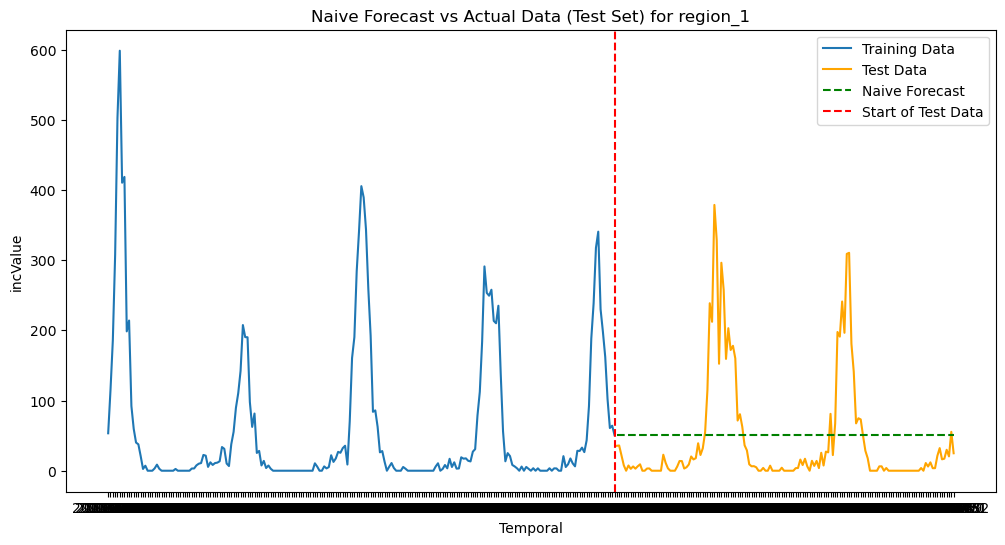

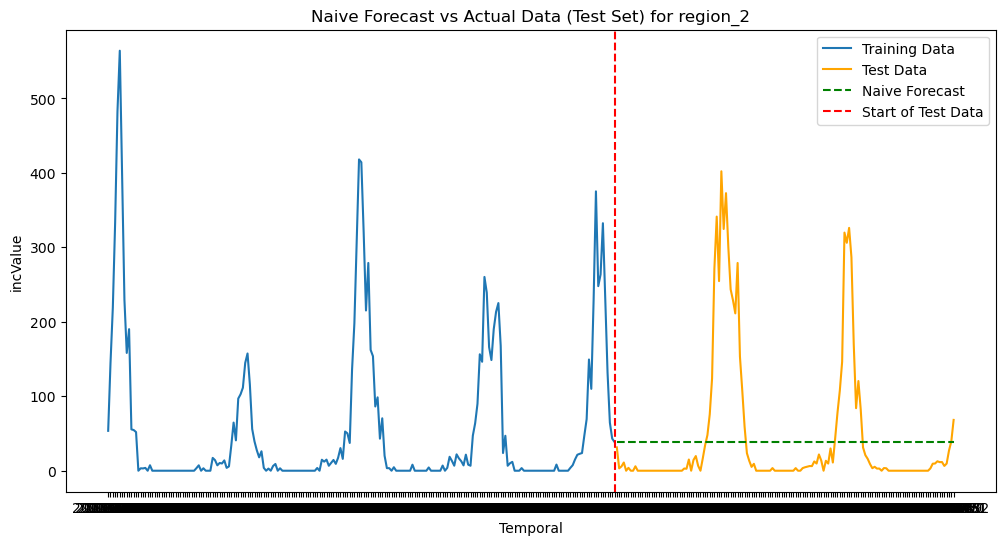

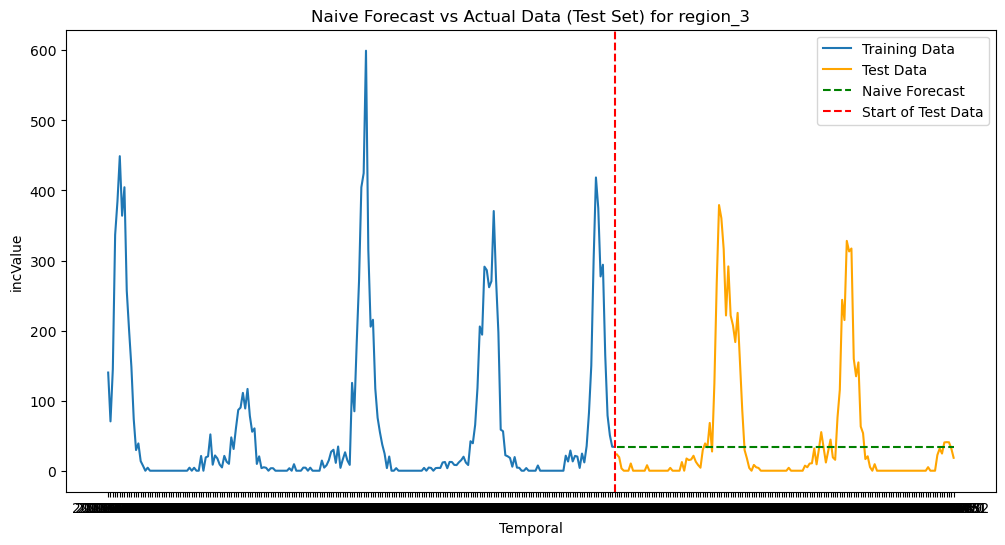

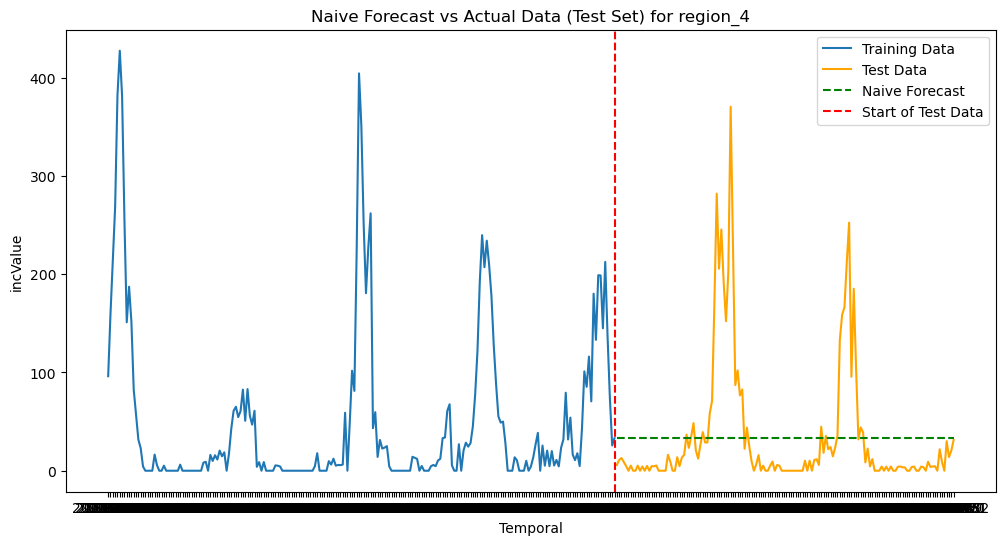

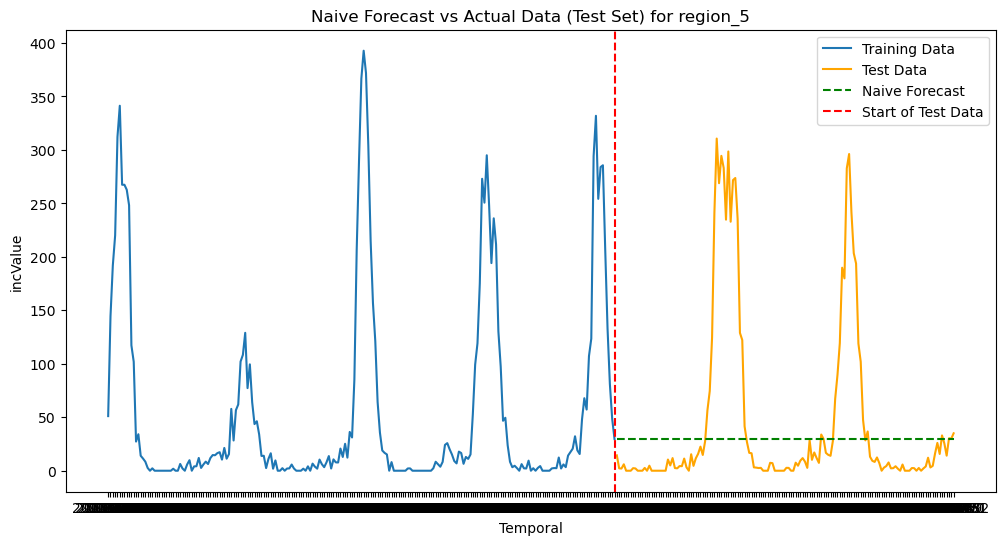

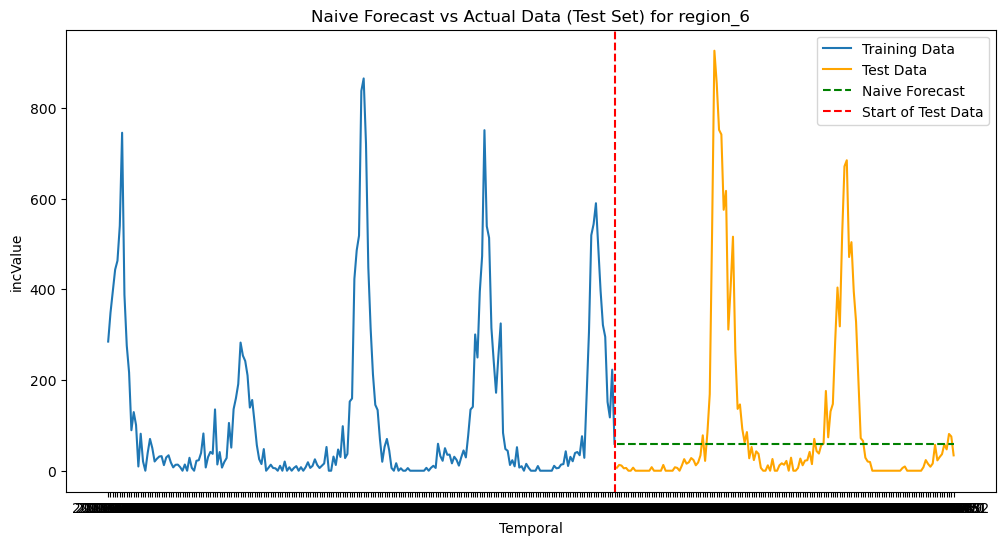

{'region_1': 79.39941271219263,
 'region_2': 92.81107836787706,
 'region_3': 86.09964815450043,
 'region_4': 65.68490911108508,
 'region_5': 84.3292408458883,
 'region_6': 196.82475038045587}

In [58]:
rmse_per_georegion = {}

for georegion in merged_data['georegion'].unique():
    # Filter data for the specific georegion
    georegion_data = filtered_data[filtered_data['georegion'] == georegion]
    
    # Split into 80/20 train and test data for this georegion
    split_index = int(len(georegion_data) * 0.60)
    train_data_georegion = georegion_data.iloc[:split_index]
    test_data_georegion = georegion_data.iloc[split_index:]
    
    # Perform naive forecast if train_data is not empty
    if not train_data_georegion.empty:
        last_train_value = train_data_georegion['incValue'].iloc[-1]
        naive_forecast_test = [last_train_value] * len(test_data_georegion)

        # Calculate RMSE on the test set
        rmse_test = np.sqrt(mean_squared_error(test_data_georegion['incValue'], naive_forecast_test))
        rmse_per_georegion[georegion] = rmse_test

        
        plt.figure(figsize=(12, 6))
        plt.plot(train_data_georegion['temporal'], train_data_georegion['incValue'], label='Training Data')
        plt.plot(test_data_georegion['temporal'], test_data_georegion['incValue'], label='Test Data', color='orange')
        plt.plot(test_data_georegion['temporal'], naive_forecast_test, label='Naive Forecast', linestyle='--', color='green')
        plt.axvline(x=train_data_georegion['temporal'].iloc[-1], color='red', linestyle='--', label='Start of Test Data')
        plt.title(f'Naive Forecast vs Actual Data (Test Set) for {georegion}')
        plt.xlabel('Temporal')
        plt.ylabel('incValue')
        plt.legend()
        plt.show()

# Displaying the RMSE for each georegion
rmse_per_georegion